### barebones version of a linear autoencoder for the mnist dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision
from torchvision import transforms

In [2]:
device = 'cuda'if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
class MNIST(Dataset):
    def __init__(self, file_path, transform = None):
        self.data = pd.read_csv(file_path)
        self.transform = transform
        
    def __len__(self):
        return(len(self.data))
    
    def __getitem__(self, index):
        image = self.data.iloc[index, 1:].values.astype(np.uint8).reshape((28, 28,1))
        label = self.data.iloc[index, 0]
        
        if self.transform is not None:
            image = self.transform(image)
        
        return image, label

In [4]:
path = os.getcwd()+'/data'
train = MNIST(path+'/mnist_train.csv', transform = transforms.ToTensor())
test = MNIST(path+'/mnist_test.csv', transform = transforms.ToTensor())

In [5]:
trainloader = DataLoader(train, batch_size = 8)
testloader = DataLoader(test, batch_size = 8)

In [6]:
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        
        self.fc1 = nn.Linear(784, encoding_dim)
        self.fc2 = nn.Linear(encoding_dim, 784)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [7]:
model = Autoencoder(encoding_dim = 32).to(device)
print(model)

Autoencoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)


In [8]:
MSE = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [10]:
epochs = 20
for epoch in range(epochs):
    training_loss = 0.0
    validation_loss = 0.0
    model.train()
    for data in trainloader:
        images, labels = data
        images = images.view(images.size(0), -1).to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        
        loss = MSE(outputs, images)
        loss.backward()
        optimizer.step()
        
        training_loss += loss.item()*images.size(0)
    model.eval()
    for data in testloader:
        images, labels = data
        images = images.view(images.size(0), -1).to(device)
        outputs = model(images)
        loss = MSE(outputs, images)
        validation_loss += loss.item()*images.size(0) 
        
    training_loss = training_loss/len(trainloader)
    validation_loss = validation_loss/len(testloader)
    print(f'epoch: {epoch+1} | Training loss: {round(training_loss, 6)} | Validation loss: {round(validation_loss, 6)}')
    

epoch: 1 | Training loss: 0.142032 | Validation loss: 0.138538
epoch: 2 | Training loss: 0.132786 | Validation loss: 0.130975
epoch: 3 | Training loss: 0.13055 | Validation loss: 0.129883
epoch: 4 | Training loss: 0.129625 | Validation loss: 0.1292
epoch: 5 | Training loss: 0.128964 | Validation loss: 0.128721
epoch: 6 | Training loss: 0.128449 | Validation loss: 0.128282
epoch: 7 | Training loss: 0.127983 | Validation loss: 0.127959
epoch: 8 | Training loss: 0.127622 | Validation loss: 0.127678
epoch: 9 | Training loss: 0.127311 | Validation loss: 0.127438
epoch: 10 | Training loss: 0.12704 | Validation loss: 0.127152
epoch: 11 | Training loss: 0.126802 | Validation loss: 0.12698
epoch: 12 | Training loss: 0.126587 | Validation loss: 0.12669
epoch: 13 | Training loss: 0.126392 | Validation loss: 0.126535
epoch: 14 | Training loss: 0.126214 | Validation loss: 0.12638
epoch: 15 | Training loss: 0.126033 | Validation loss: 0.126225
epoch: 16 | Training loss: 0.12587 | Validation loss: 0.

In [24]:
def convert(image):
    image = image.to('cpu').detach().squeeze().numpy()
    return image

In [42]:
img, label = iter(testloader).next()
label

torch.Size([1, 28, 28])

In [ ]:
img = img[3]
img.shape

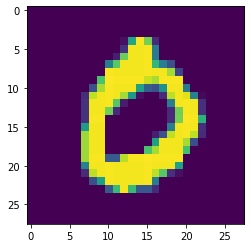

In [43]:
plt.imshow(convert(img))

In [44]:
img = img.view(img.size(0), -1).to(device)
output = model(img)

In [45]:
output = output.view(1,28,28)

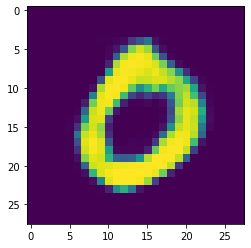

In [46]:
plt.imshow(convert(output))